# SST (Spatial Stress Test) Behavioral Analysis

Data Collected through Winter 2017

In [1]:
import pandas as pd
import moss
from scipy import stats
import scipy as sp
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path as op
import re

# Gather project info & functions
from sst_setup_project import *

#widget ability
import ipywidgets
from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML

import glob

# for plotting
sns.set(style='whitegrid', context='poster')
%matplotlib inline

# R for stats
# %load_ext rpy2.ipython
# %R require(lme4)
# %R require(lmerTest)

v2


### Set up directories & exp-specific information

In [2]:
dirs = dict()
# Change this to wherever Github repository is stored on your computer:
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/SST')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')

# On the server, so make sure it's mounted!
dirs['navdir'] = op.join('/Volumes/group/awagner/sgagnon/SST/nav_data')
dirs['subj_info_file'] = op.join(dirs['navdir'], 'analysis', 'subj_info.csv')
dirs['order_file'] = op.join(dirs['navdir'], 'analysis', 'SST_env_order_training.csv')

In [3]:
proj = gather_experiment_info(exp_name='SST', dirs=dirs)

v2


## Read in subject information

In [4]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info[['subid']] = subj_info.subid.astype(str)
subj_info.group.value_counts()

control    19
stress     17
Name: group, dtype: int64

# Read in data

In [14]:
filename = '/Volumes/group/awagner/sgagnon/SST/nav_data/group_fmri_logs.h5'
df_in = pd.read_hdf(filename, 'df')
df_in.shape

(131569, 14)

# Plot

### Some notes:
- Subject 3 missing run 2
- Subjects 22 have off env/trials [in run 2, crashed during env 5, but then restarted env 5 in 2nd log file; remove env 5 from first log file]
- Subjects 13 missing trials 1-3 from run 1 [shifted envs up in order file, and removed trials 10-12]
- Subject 11, run 2 (missing trials 1-3) [shifted envs up in order file, and removed trials 10-12]

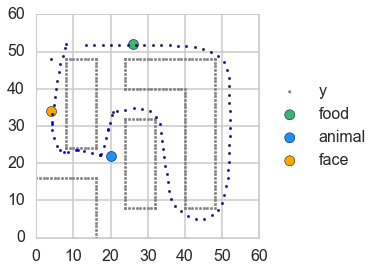

In [15]:
def plot_sub(subj, env, test_trial, rep):
    plot_paths(env=env, subj=subj, 
               dp=df_in.loc[(df_in['type'] == test_trial) &
                            (df_in.rep == rep)], 
               proj=proj, dirs=dirs)
    
subj_opts = ipywidgets.Select(options=list(df_in.subid.unique()))
env_opts = ipywidgets.ToggleButtons(options=list(np.sort(df_in.env.unique())))
test_opts = ipywidgets.ToggleButtons(options=list(['habit', 'shortcut']))
rep_opts = ipywidgets.IntSlider(min=1, max=2)

w = ipywidgets.interact(plot_sub, 
                        subj=subj_opts, 
                        env=env_opts, 
                        test_trial=test_opts, 
                        rep=rep_opts)